# SVMs are Cool

Name: Alex Ojemann

(OK, so this notebook isn't the prettiest one I've made for participation. Sorry about that.)

Here at the top I'm importing my necessary components. We're going to set up some toy datasets, create Support Vector Machines (Support Vector Classifiers, or SVCs), and do some plotting / analysis. I also define the show_decision_surface function we've used in the past. I idd amend it from previous versions so we can also visualize support vectors as circled samples, and added a (pretty hard-coded) title.

In [1]:
import matplotlib.pyplot as plt
import sklearn.datasets as data
import sklearn.svm
import numpy as np

In [2]:
def show_decision_surface(model, X, y, support_vectors, index, ax=None):
    """
    Helper function to visualize the decision surface of the trained model
    :param model with predict method
    :return: None
    """
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x_grid, y_grid = np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1)
    xx, yy = np.meshgrid(x_grid, y_grid)
    r1, r2 = xx.reshape(-1, 1), yy.reshape(-1, 1)
    grid = np.hstack((r1, r2))
    y_hat = model.predict(grid).reshape(-1, )
    zz = y_hat.reshape(xx.shape)

    if ax is None:
        plt.contourf(xx, yy, zz, cmap='PiYG')
        plt.scatter(X[:, 0], X[:, 1], c=y)
        plt.scatter(support_vectors[:,0],support_vectors[:,1],facecolors='none', edgecolors='c')
        plt.title("SVM after "+str(index)+" Epochs")
        plt.show()
    else:
        ax.contourf(xx, yy, zz, cmap='PiYG')
        ax.scatter(X[:, 0], X[:, 1], c=y)
        ax.scatter(support_vectors[:,0],support_vectors[:,1],facecolors='none', edgecolors='c')
        ax.set_title = ("SVM after "+str(index)+" Epochs")
        


### Creating separable data

First, we'll create a few separable datasets. Our binary_blobs dataset is going to be pretty cleanly separable. The confusing_blobs dataset should have some tricky nonlinearity. And the circle_blobs dataset will be cleary non-linearly-separable.

In [3]:
binary_blobs = data.make_blobs(centers=2, cluster_std=3, random_state=3623)
confusing_blobs = data.make_blobs(centers=2, cluster_std=3, random_state = 230306)
circle_blobs = data.make_circles(random_state=3623)

### Visualizing SVM Epochs on binary_blobs

The code below loops over a different value for the number of Epochs (max_iter) our SVC object has to train. Answer the questions in the cells below the loop.

(Sorry for the solver terminated errors)

#### Q1: On the binary_blobs dataset, how many Epochs does it take to get 100% accuracy on the training dataset (i.e. when does accuracy = 1.0)?

3 epochs

#### Q2: Does the decision boundary change on future Epoch amounts after we have found a decision boundary that works perfectly on the training dataset? Does it ever stop moving?

Yes, it continues to change after we first reach 100% accuracy at 3 epochs. It appears to stop moving after 5 epochs.

accuracy for i = 0: 0.5


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=0).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


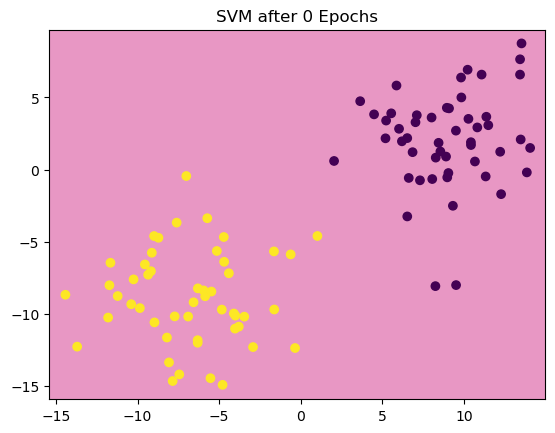

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 1: 0.97


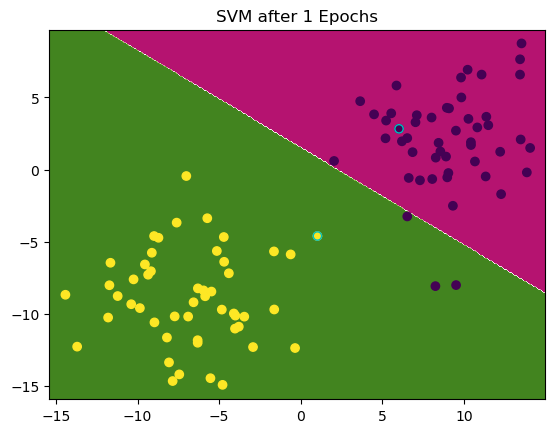

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 2: 0.99


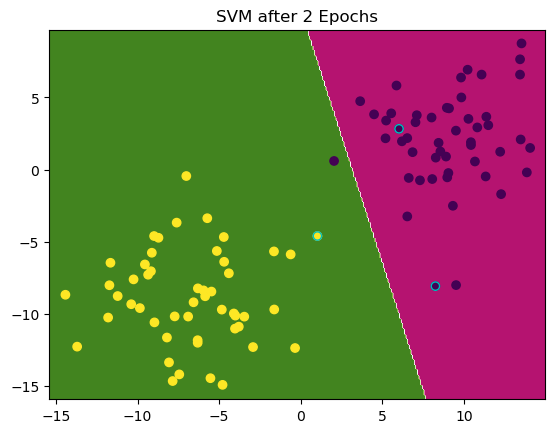

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 3: 1.0


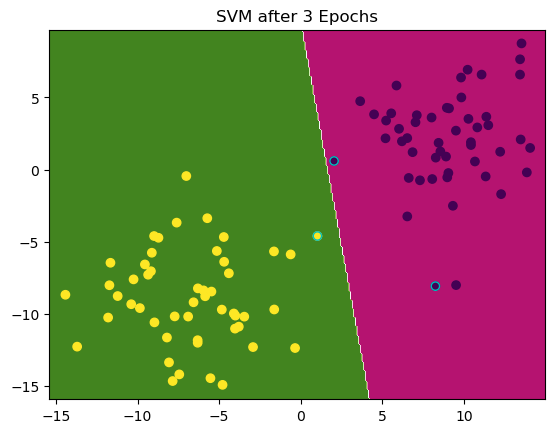

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=4).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 4: 1.0


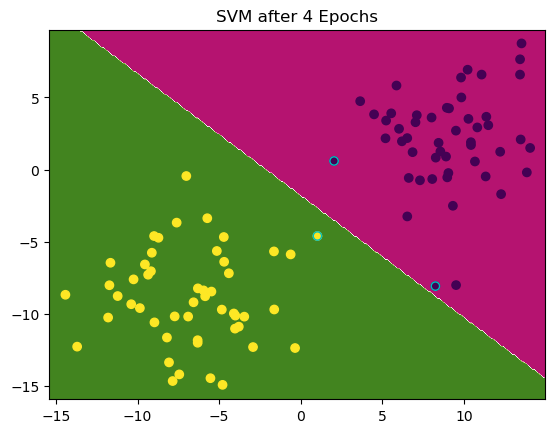

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 5: 1.0


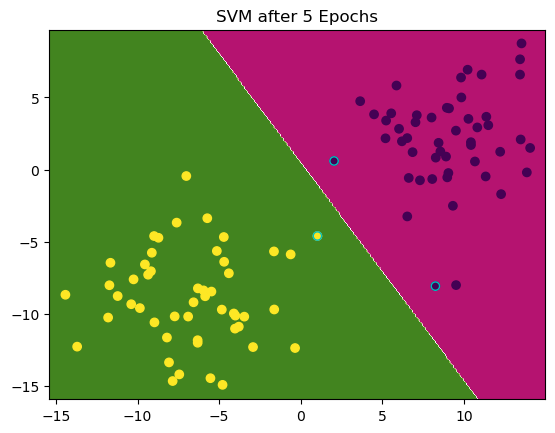

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=6).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 6: 1.0


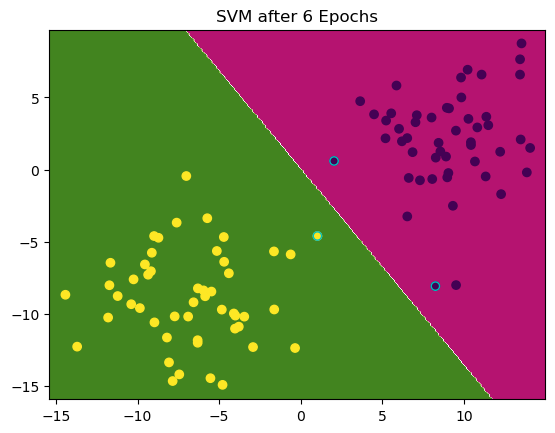

accuracy for i = 7: 1.0


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=7).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


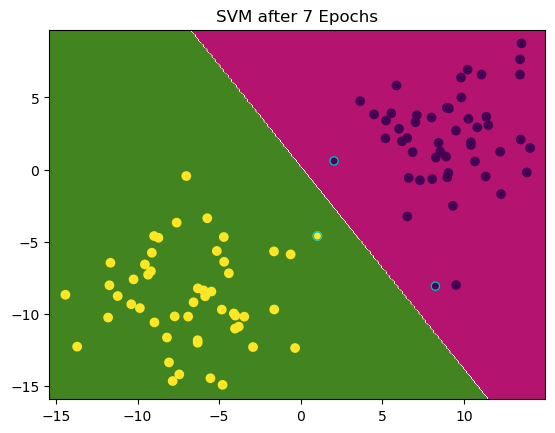

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=8).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 8: 1.0


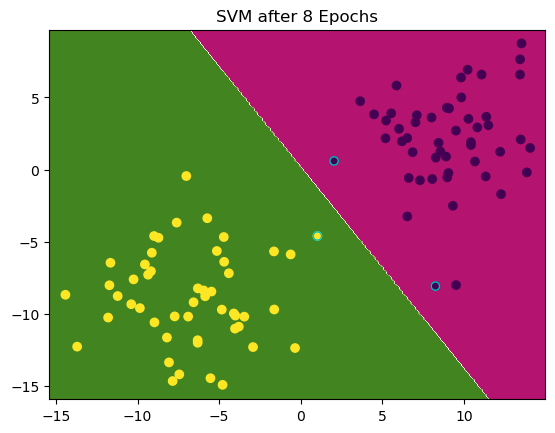

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=9).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 9: 1.0


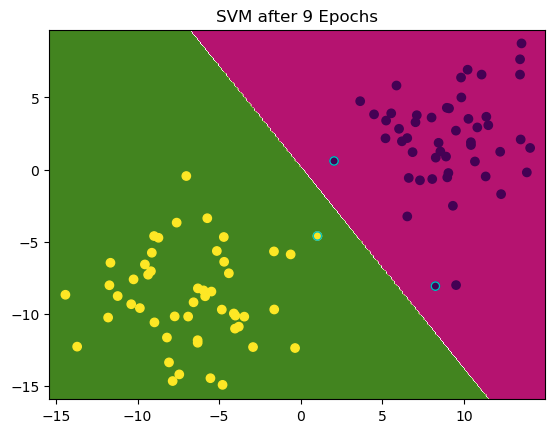

In [9]:
%matplotlib inline
x = binary_blobs[0]
y = binary_blobs[1]

for i in range(10):
    svm = sklearn.svm.SVC(max_iter=i,kernel='linear')
    svm.fit(x,y) 
    print("accuracy for i = " + str(i) + ": " + str(svm.score(x,y)))
    show_decision_surface(svm, x, y, svm.support_vectors_, i)

### Exploring Additional Datasets

Explore the use of the confusing_blobs dataset and the circle_blobs dataset. Write any additional thoughts below. Q3 is open ended, with some suggested topics. Choose one or more of them to answer.

#### Q3: Discuss some generalization of the circle_blobs. Options include:
##### Is the confusing_blobs dataset as easily separable? How long does it take to create a stable decision boundary?

confusing_blobs is not nearly as easily separable as binary_blobs. In the 9 epochs explored initially it doesn't appear to form a stable decision boundary. When I increased the number of epochs to 100, the decision boundary still didn't quite stabilize but it came somewhat close to doing so in that it always had a slight upward slope and intersected with the y axis labels around 0 after about 50 epochs.

##### What happens when you feed in the circle_blobs to a linear kernel SVM?

The linear kernel SVM can't separate circle_blobs with nearly as good of accuracy as the other two data sets.

##### What happens when you use other kernels across the datasets? Do the Support Vectors change? Does the decision boundary change?

The rbf kernel performs much better on the circle_blobs data. It allows for a decision boundary that much more accurately captures the ideal circular decision boundary than a line.

##### What other interesting explorations did you decide to do? Did you look at some real-world data? Did you play with scaling and normalization?



accuracy for i = 0: 0.5


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=0).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


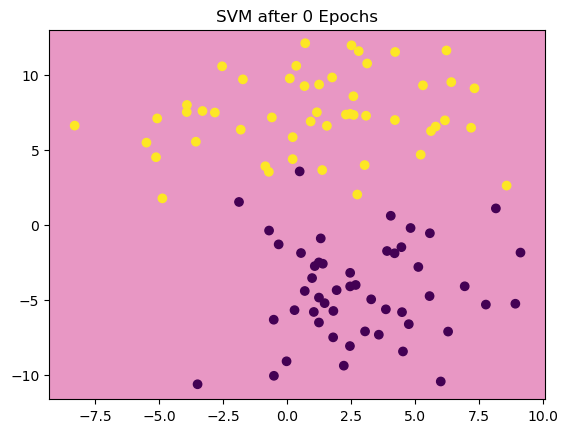

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 1: 0.83


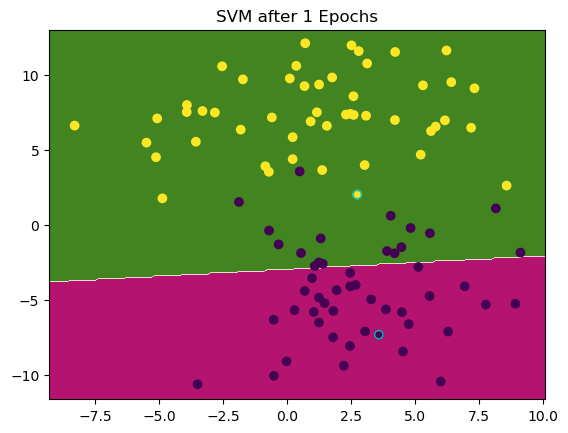

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 2: 0.66


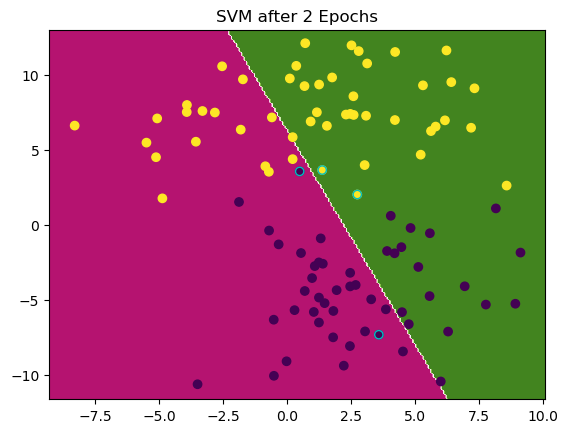

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 3: 0.89


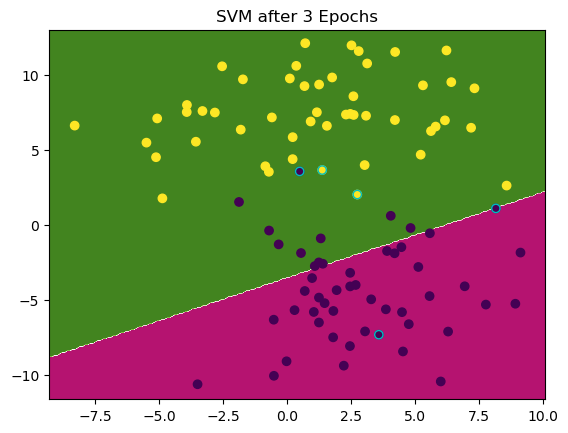

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=4).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 4: 0.9


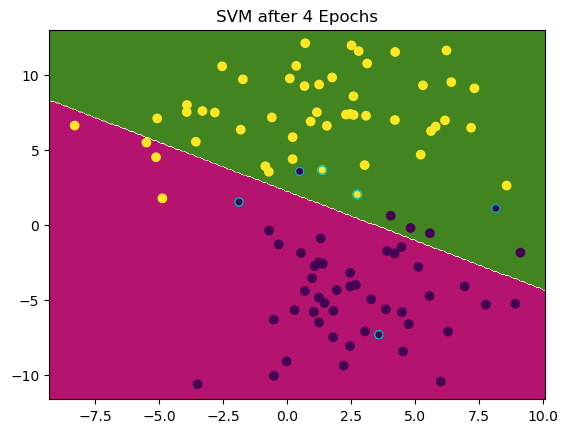

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 5: 0.88


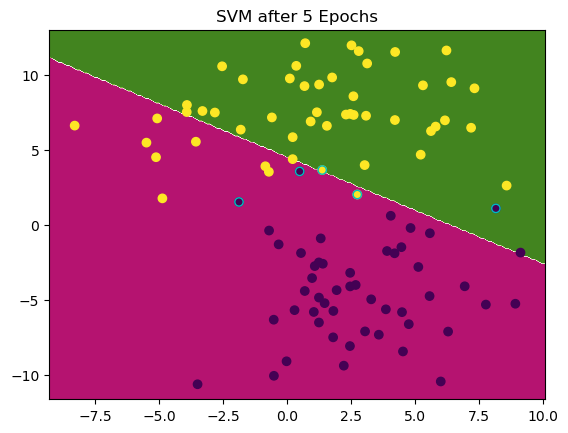

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=6).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 6: 0.91


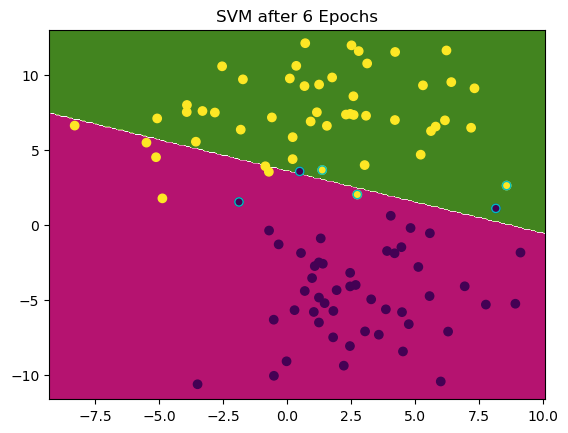

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=7).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 7: 0.98


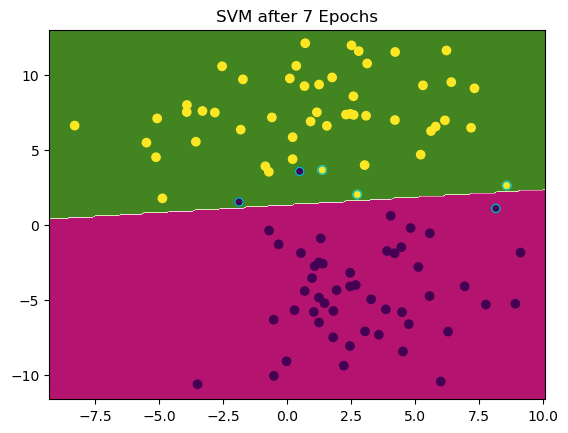

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=8).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 8: 0.81


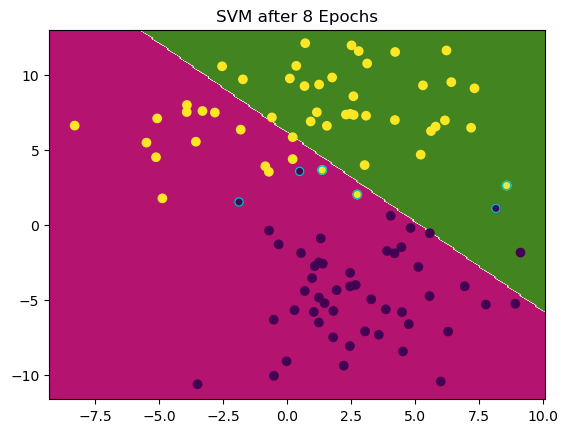

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=9).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 9: 0.97


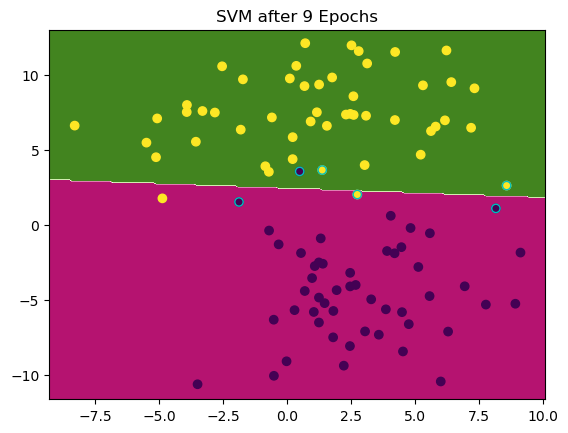

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 10: 0.97


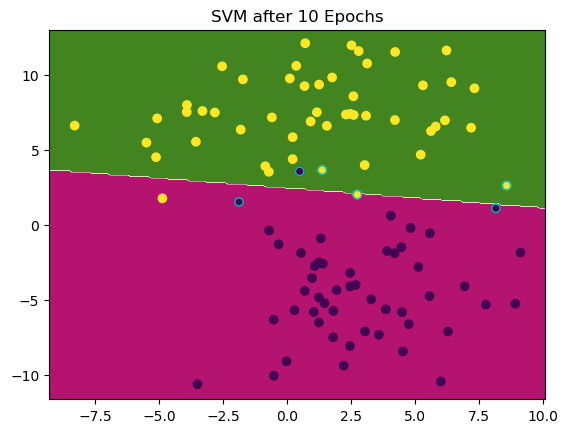

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=11).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 11: 0.94


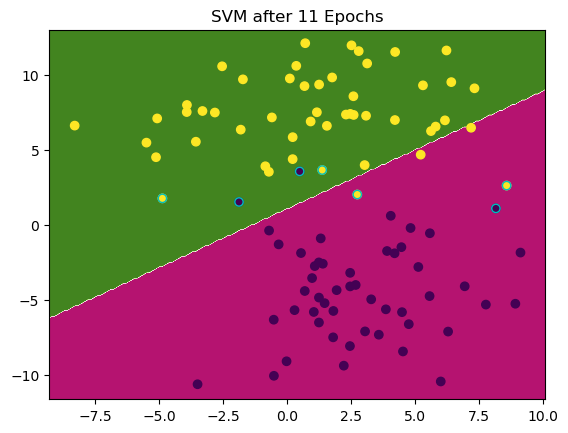

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=12).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 12: 0.99


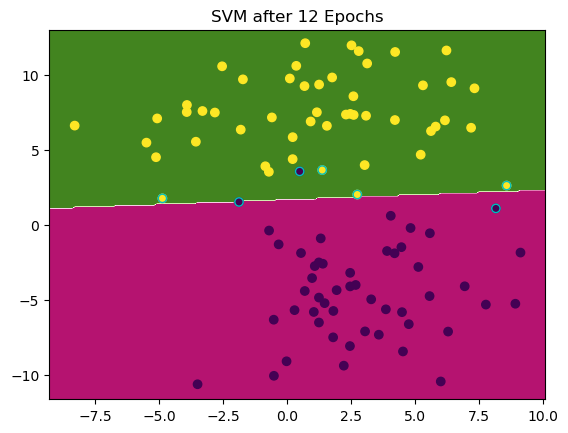

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=13).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 13: 0.95


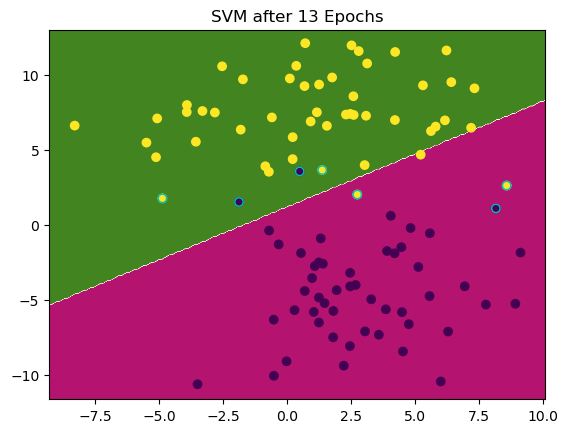

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=14).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 14: 0.99


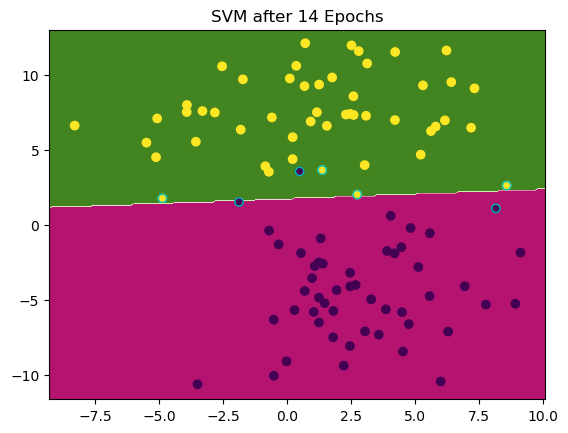

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 15: 0.95


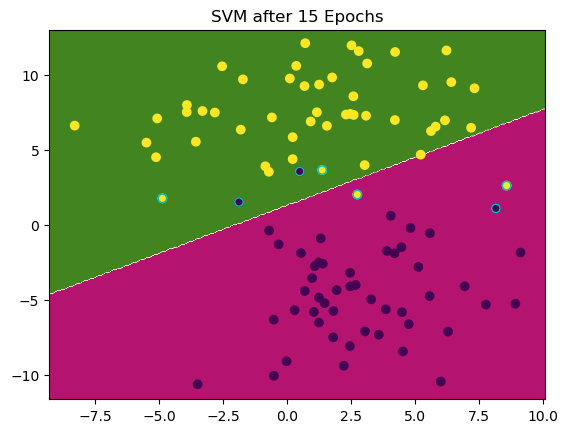

accuracy for i = 16: 0.99


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=16).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


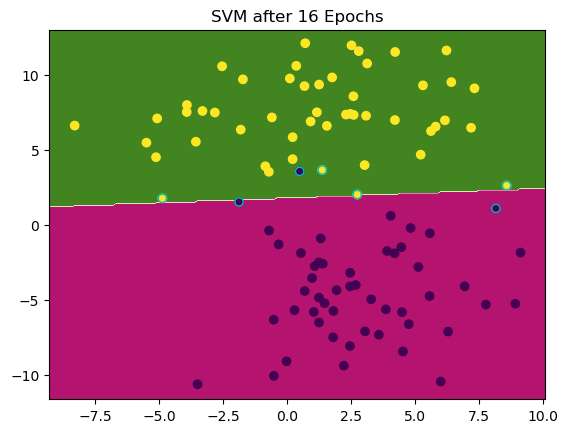

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=17).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 17: 0.96


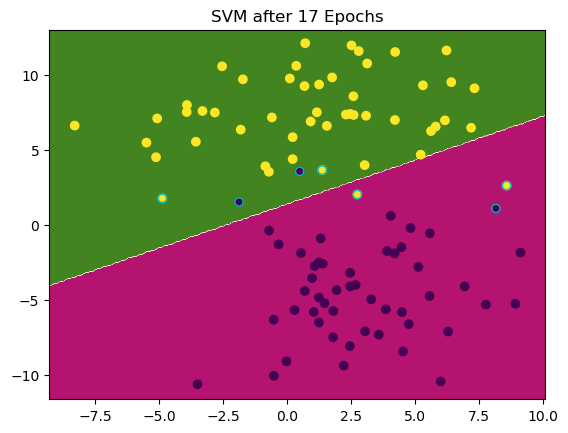

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=18).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 18: 0.98


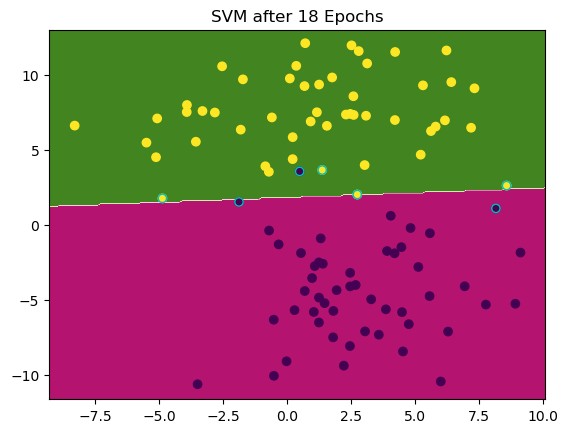

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=19).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 19: 0.96


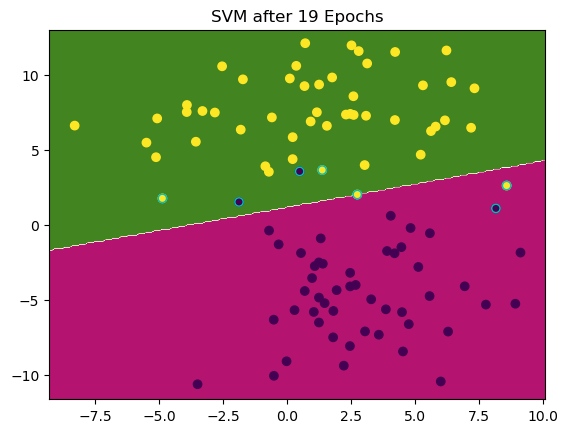

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 20: 0.98


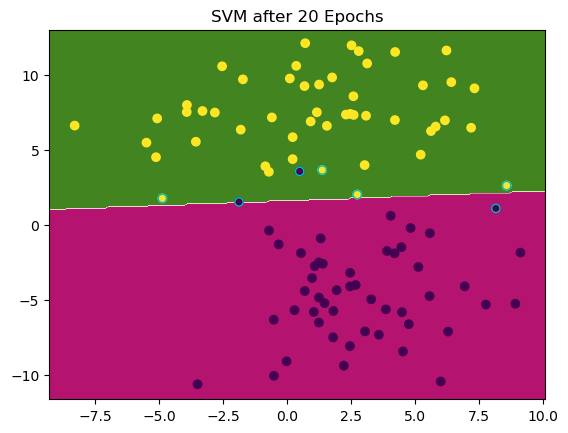

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=21).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 21: 0.97


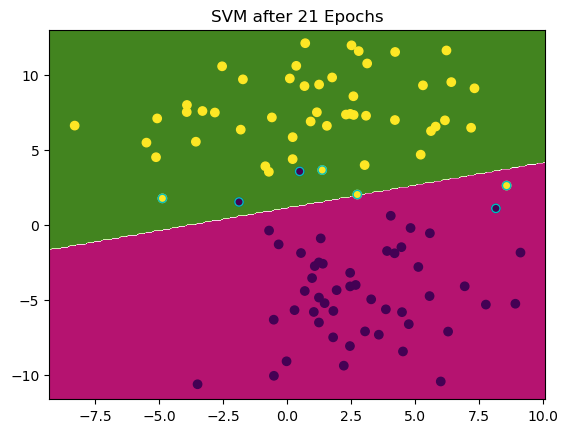

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=22).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 22: 0.98


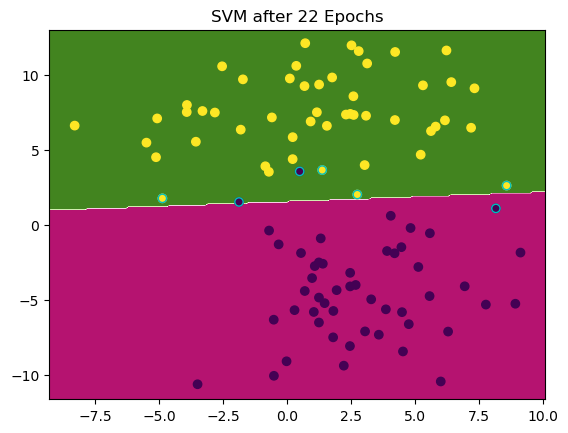

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=23).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 23: 0.97


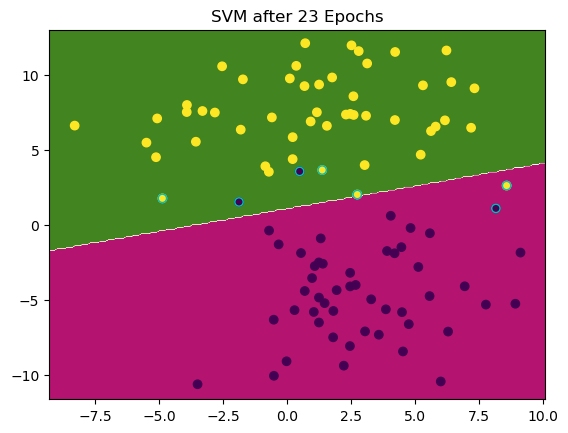

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=24).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 24: 0.98


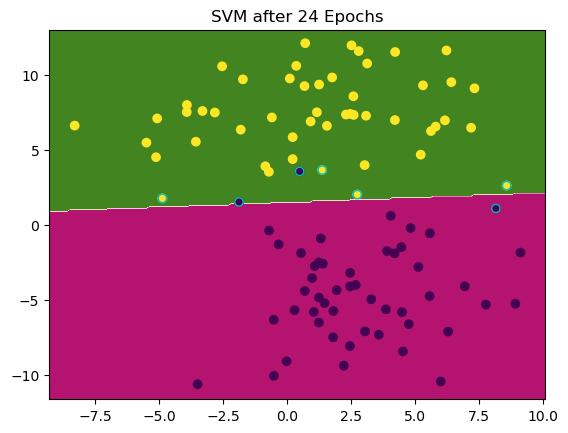

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=25).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 25: 0.97


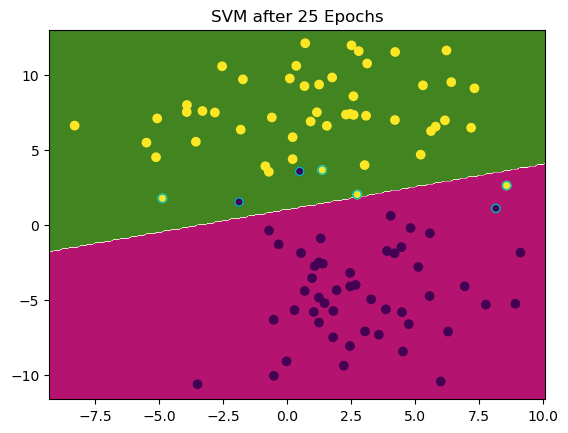

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=26).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 26: 0.98


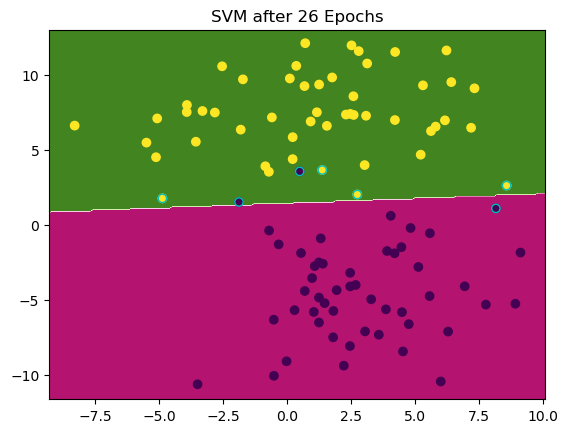

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=27).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 27: 0.97


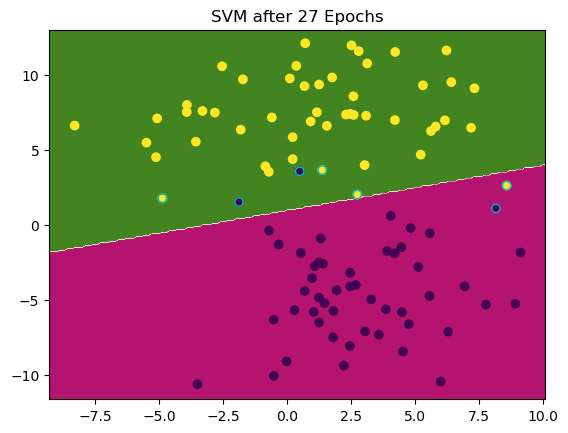

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=28).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 28: 0.98


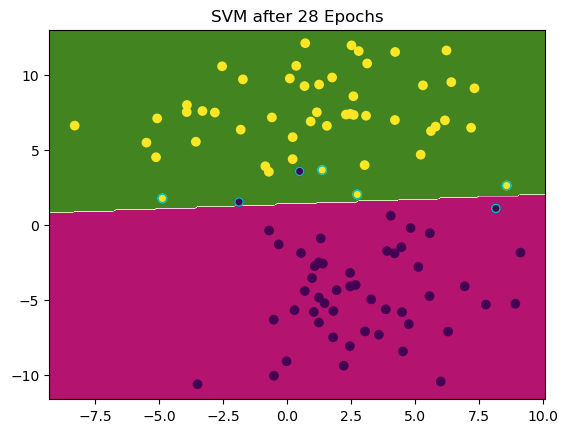

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=29).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 29: 0.97


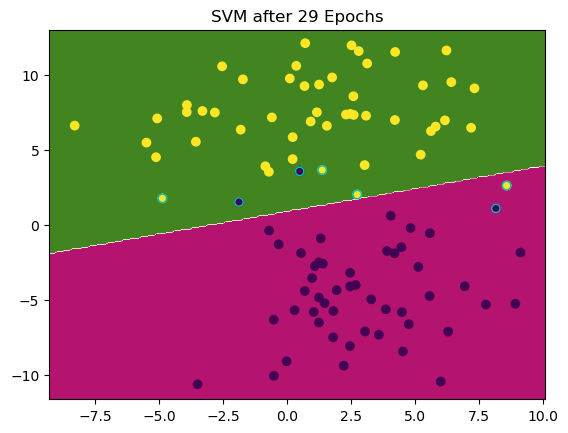

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 30: 0.98


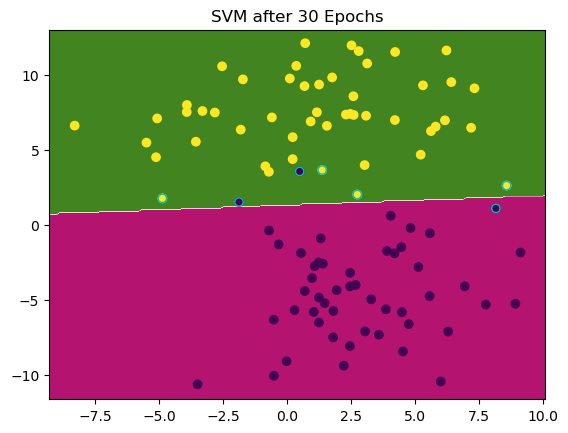

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=31).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 31: 0.97


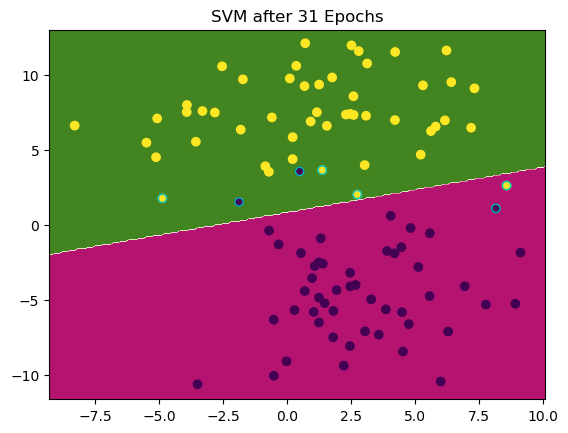

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=32).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 32: 0.98


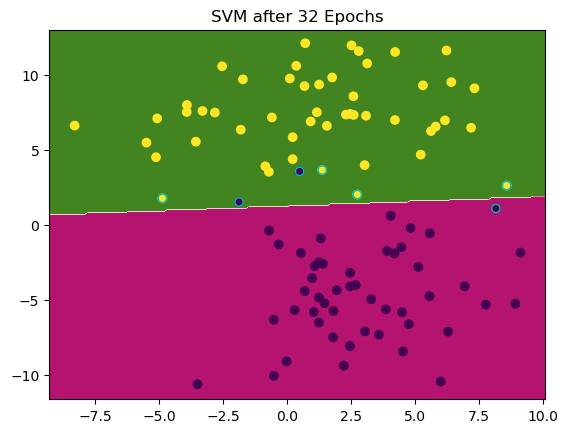

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=33).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 33: 0.97


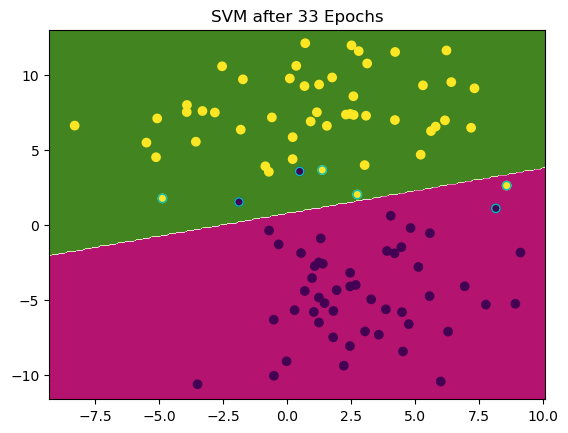

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=34).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 34: 0.98


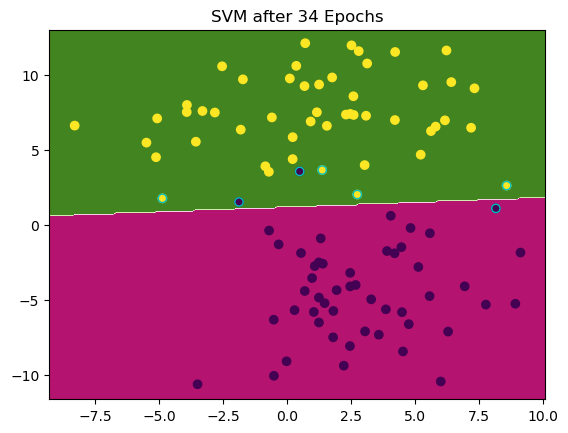

accuracy for i = 35: 0.97


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=35).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


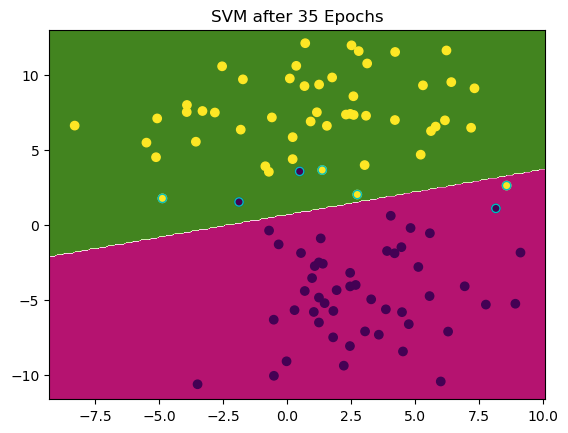

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=36).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 36: 0.98


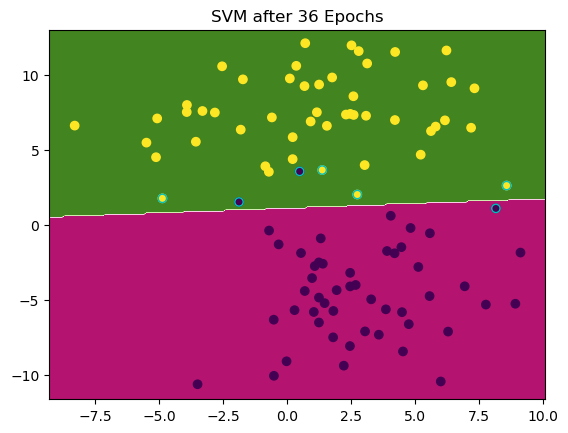

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=37).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 37: 0.97


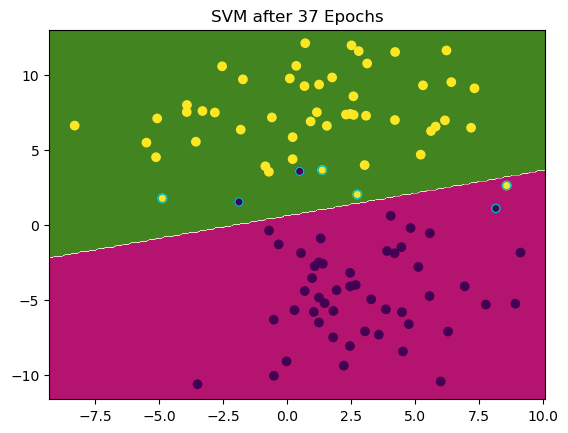

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=38).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 38: 0.98


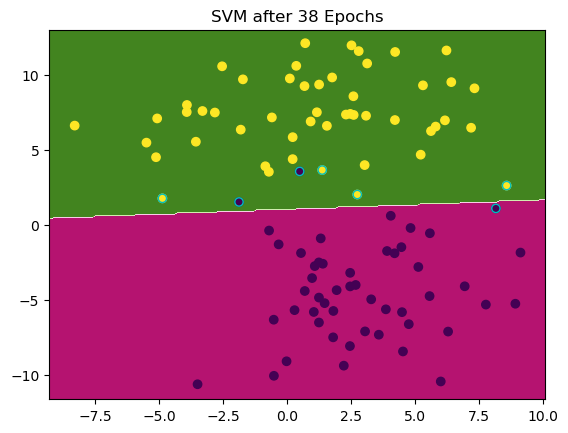

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=39).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 39: 0.97


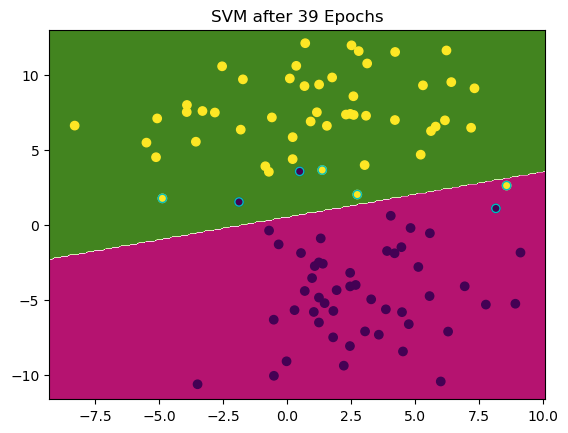

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=40).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 40: 0.98


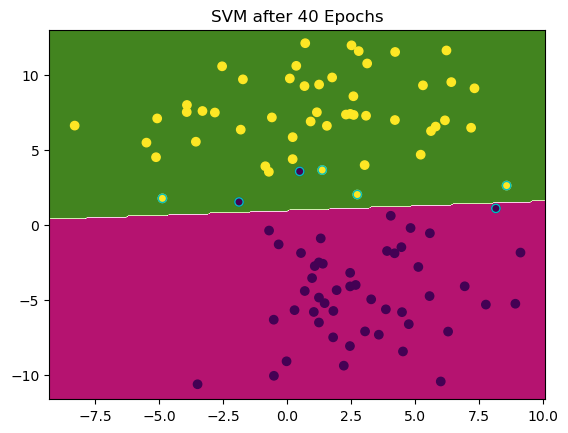

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=41).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 41: 0.97


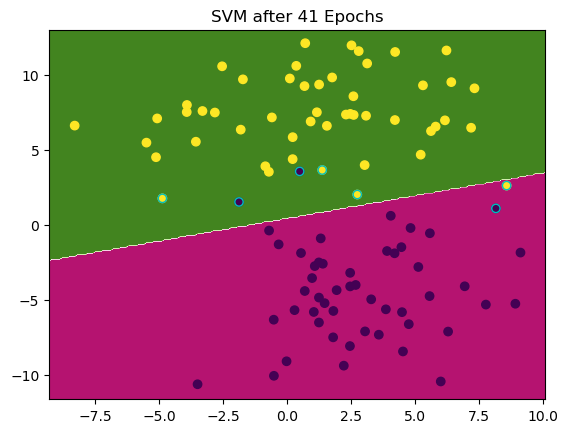

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=42).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 42: 0.98


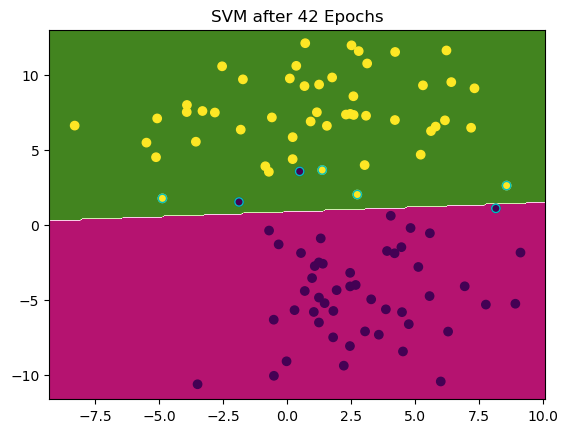

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=43).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 43: 0.97


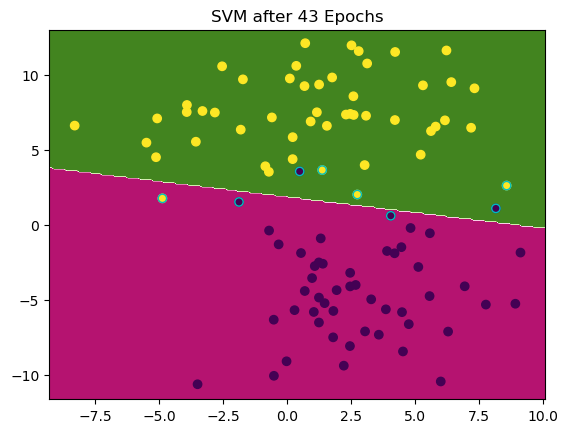

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=44).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 44: 0.97


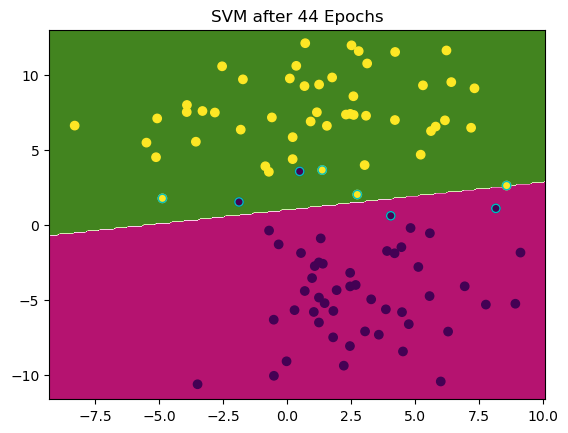

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=45).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 45: 0.97


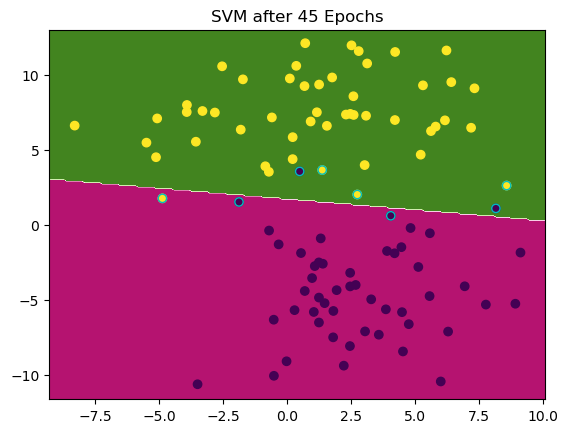

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=46).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 46: 0.97


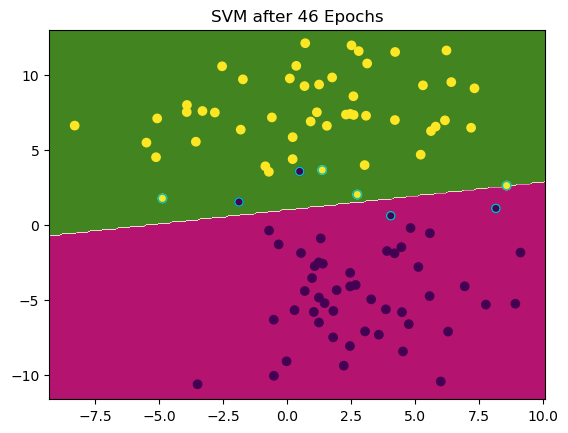

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=47).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 47: 0.99


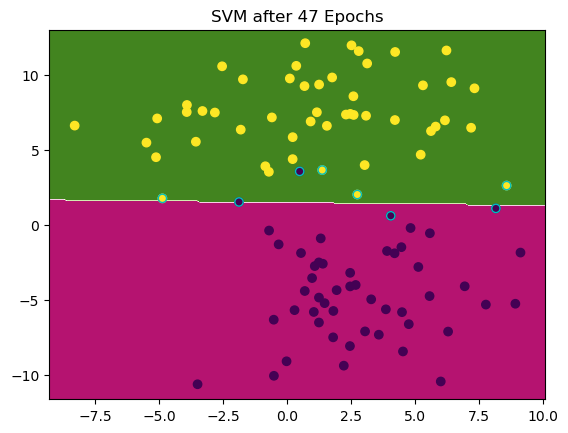

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=48).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 48: 0.96


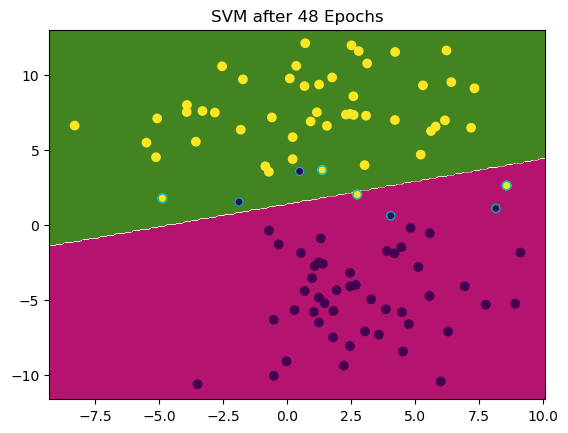

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=49).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 49: 0.97


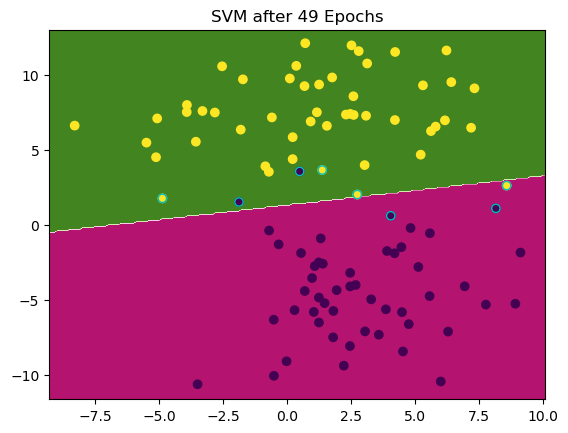

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 50: 0.97


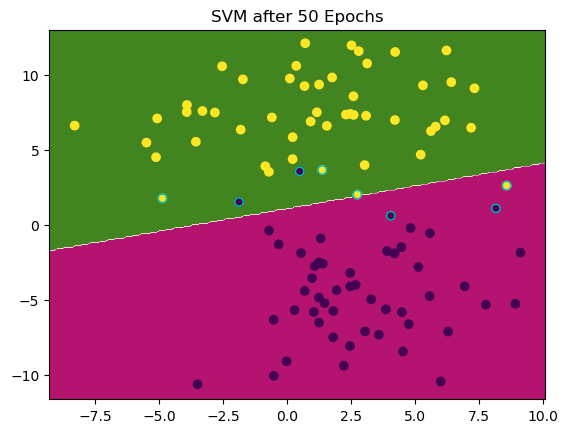

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=51).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 51: 0.97


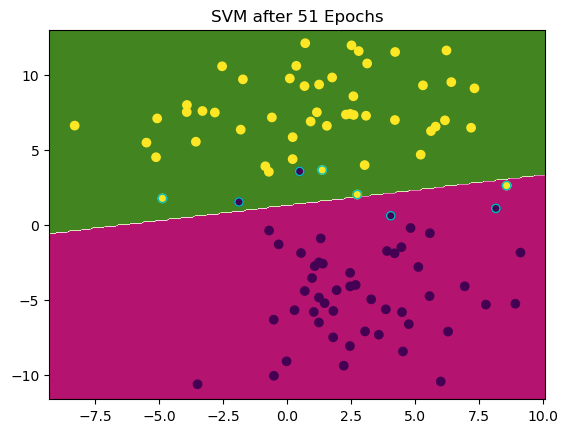

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=52).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 52: 0.97


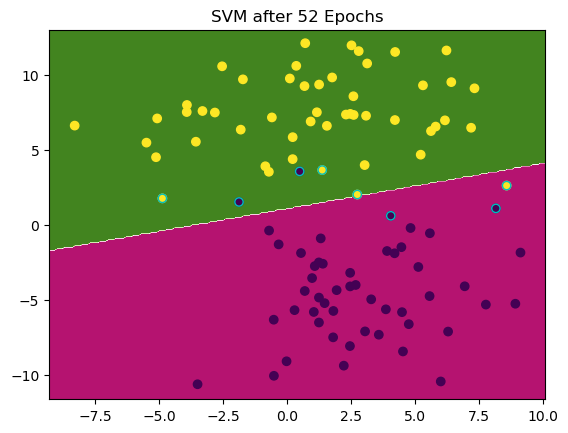

accuracy for i = 53: 0.97


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=53).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


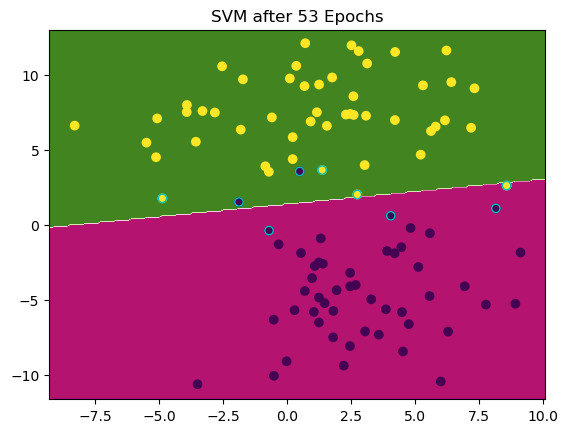

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=54).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 54: 0.96


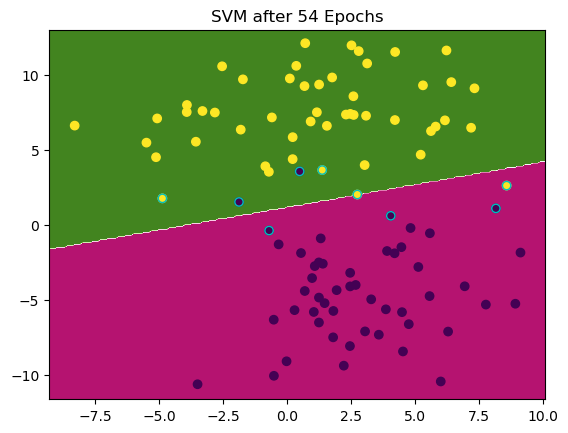

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=55).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 55: 0.97


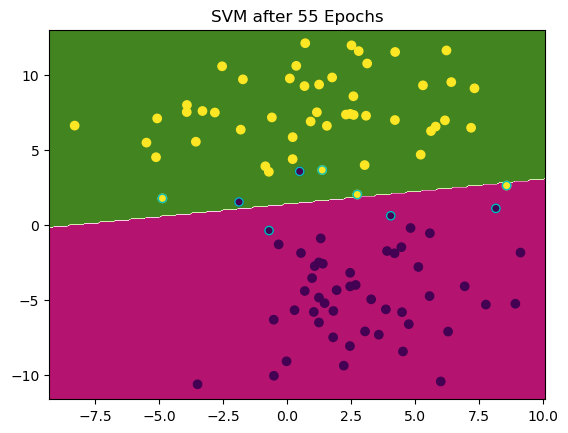

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=56).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 56: 0.96


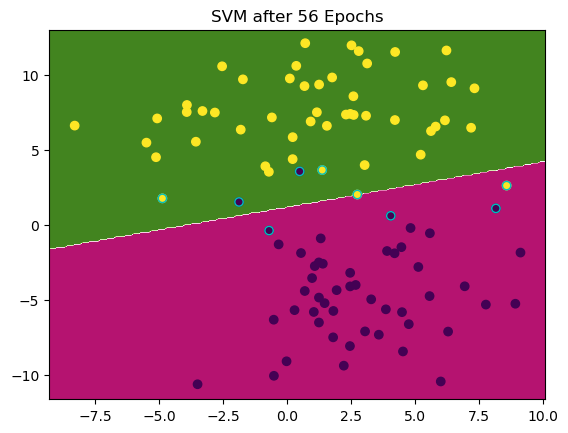

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=57).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 57: 0.97


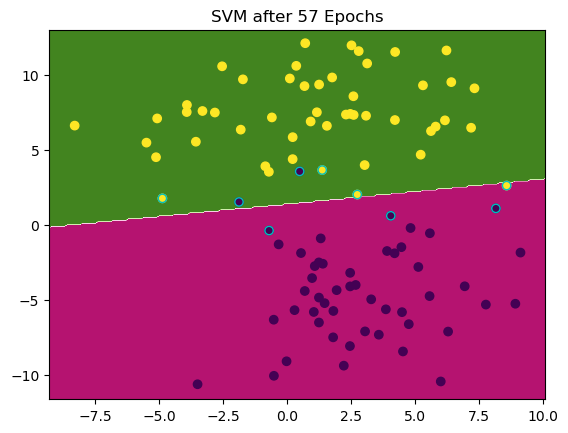

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=58).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 58: 0.96


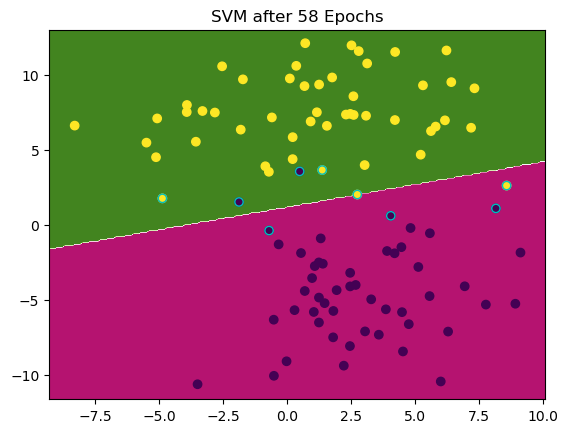

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=59).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 59: 0.97


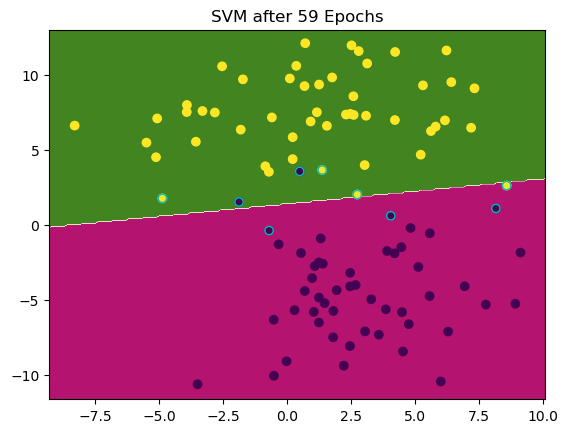

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=60).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 60: 0.97


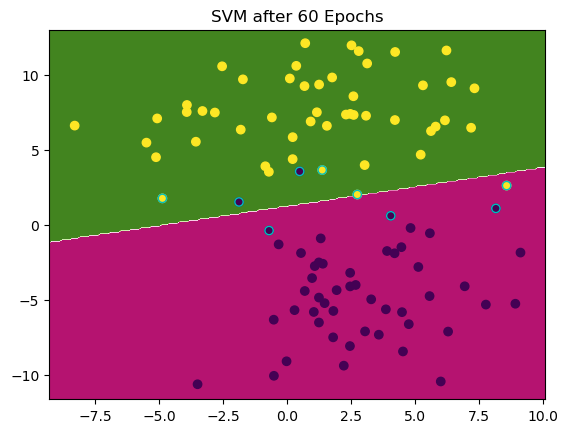

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=61).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 61: 0.97


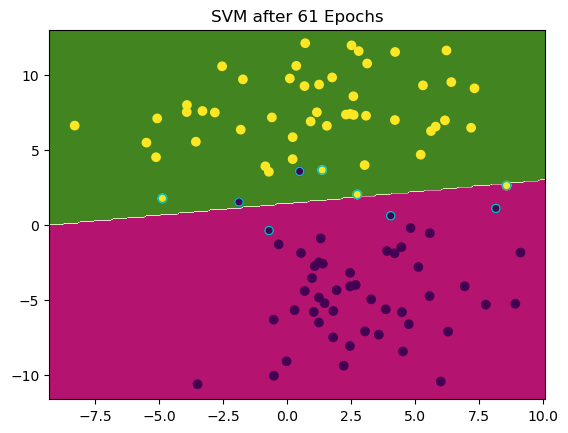

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=62).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 62: 0.97


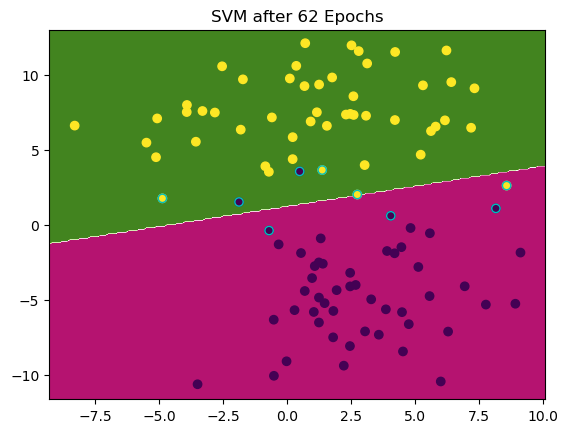

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=63).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 63: 0.97


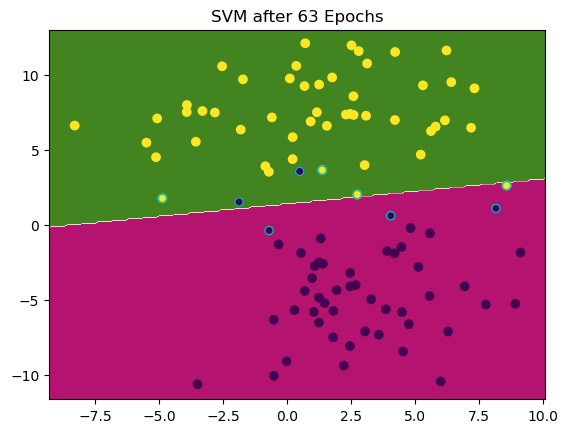

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=64).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 64: 0.97


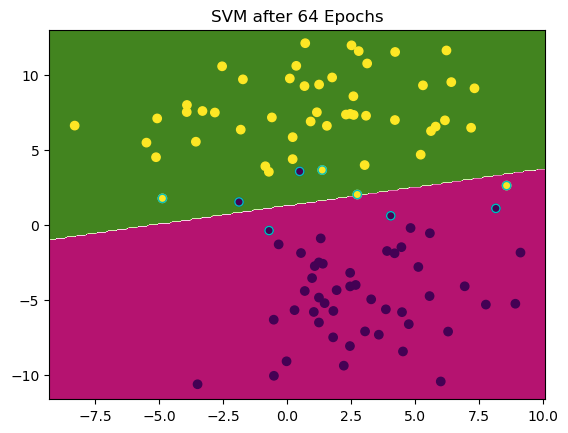

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=65).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 65: 0.96


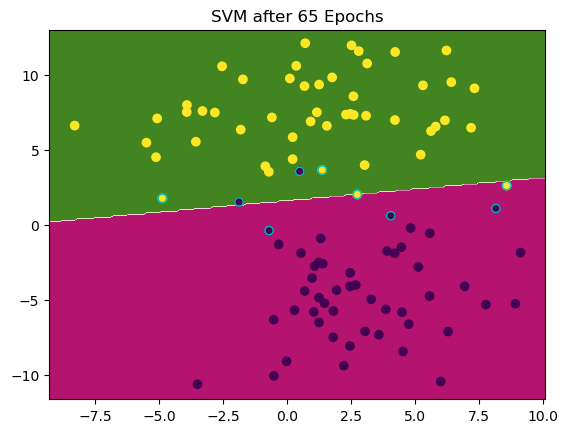

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=66).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 66: 0.96


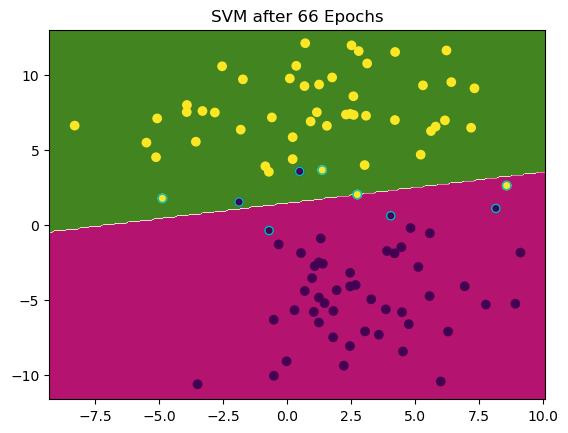

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=67).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 67: 0.96


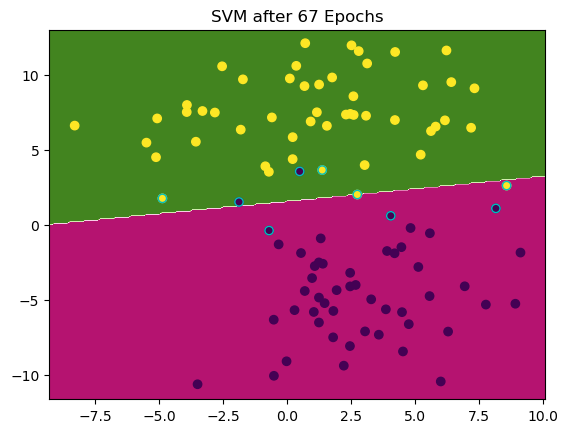

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=68).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 68: 0.97


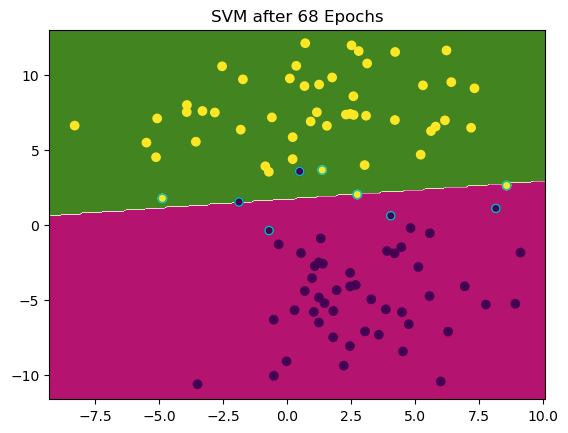

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=69).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 69: 0.96


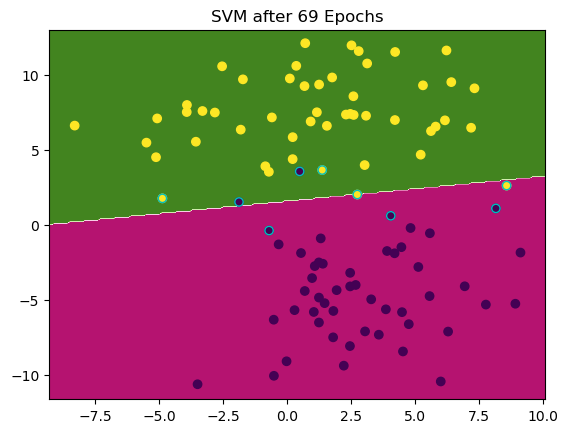

accuracy for i = 70: 0.97


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=70).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


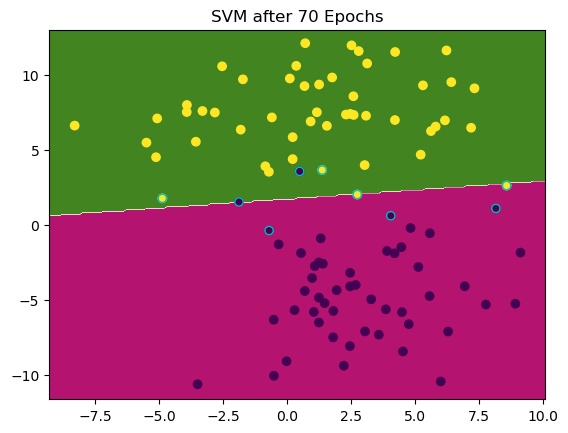

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=71).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 71: 0.96


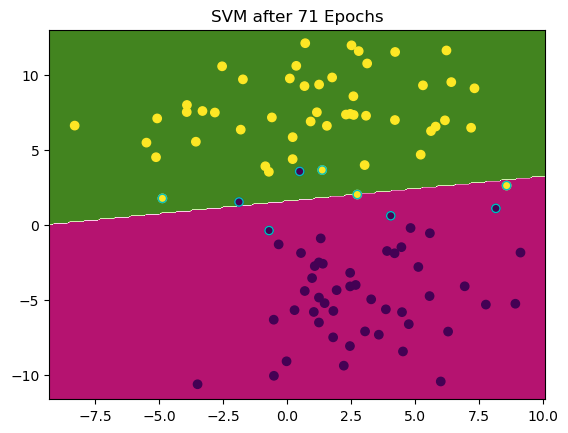

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=72).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 72: 0.97


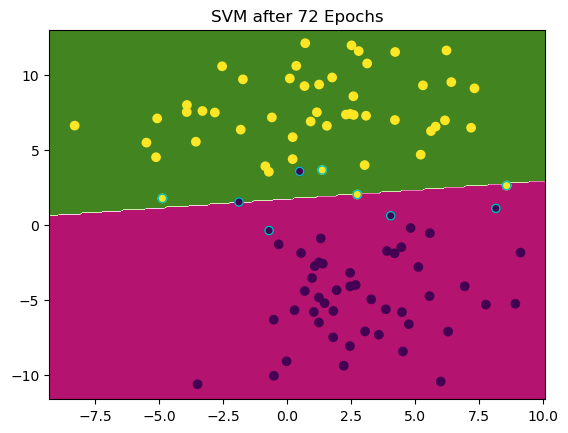

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=73).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 73: 0.96


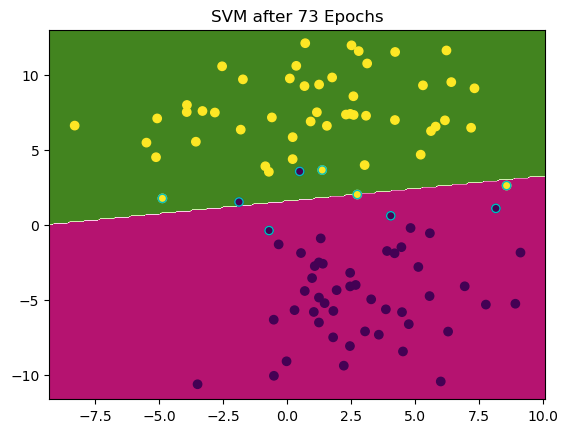

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=74).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 74: 0.97


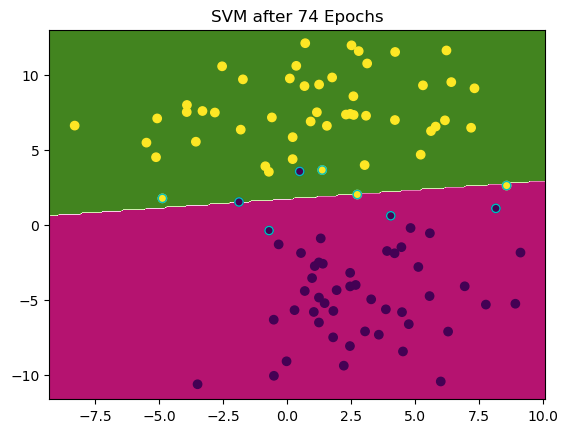

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=75).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 75: 0.96


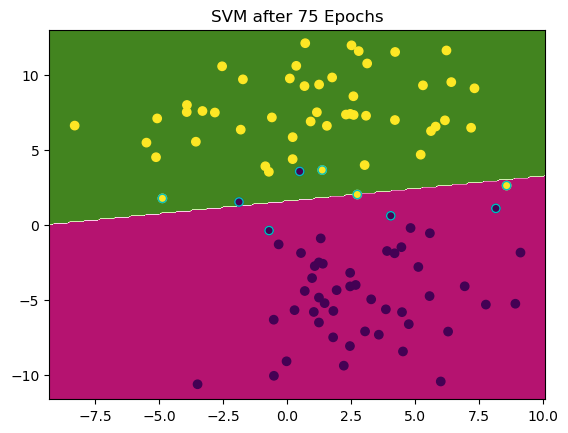

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=76).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 76: 0.97


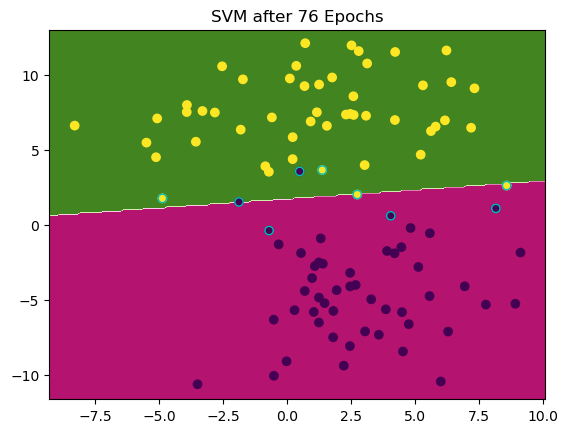

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=77).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 77: 0.96


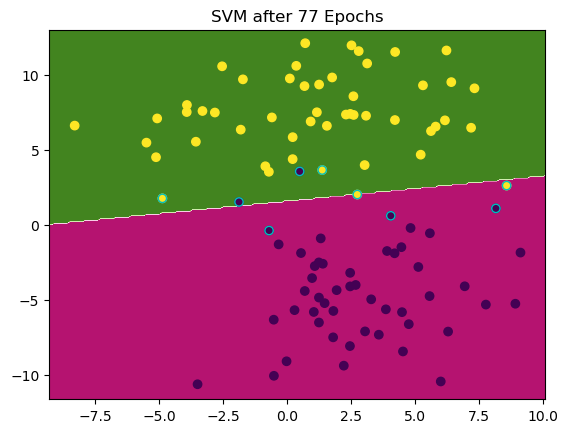

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=78).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 78: 0.97


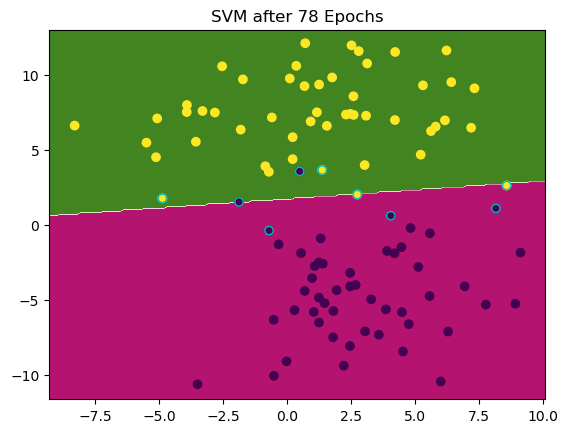

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=79).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 79: 0.96


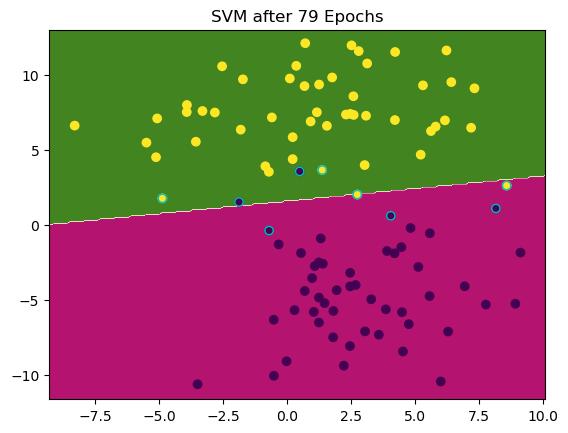

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=80).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 80: 0.97


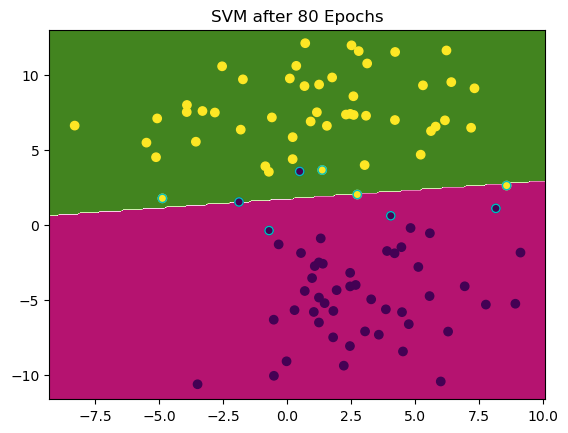

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=81).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 81: 0.96


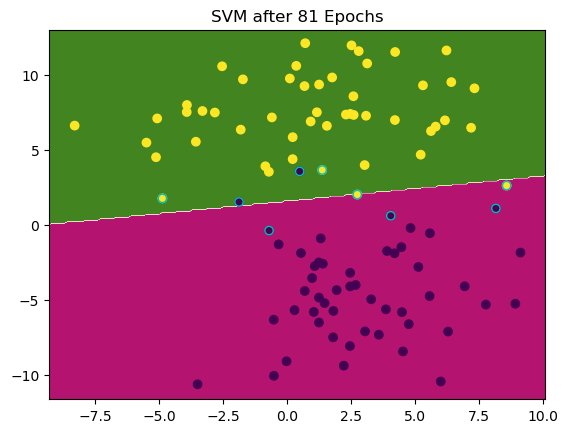

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=82).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 82: 0.97


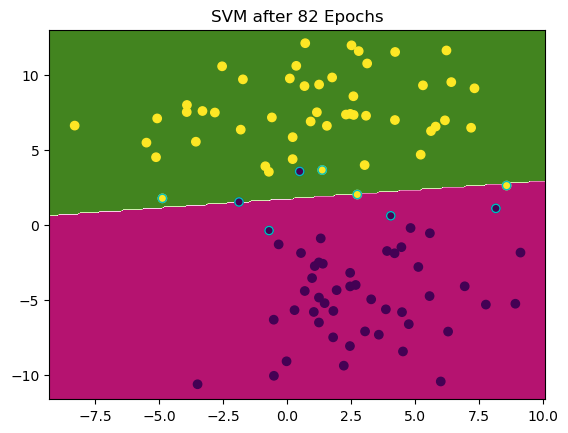

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=83).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 83: 0.96


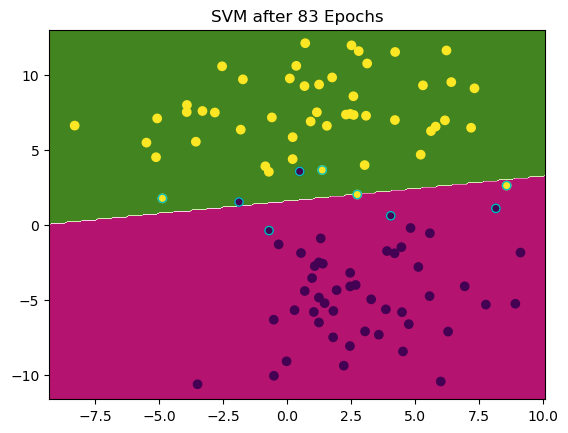

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=84).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 84: 0.97


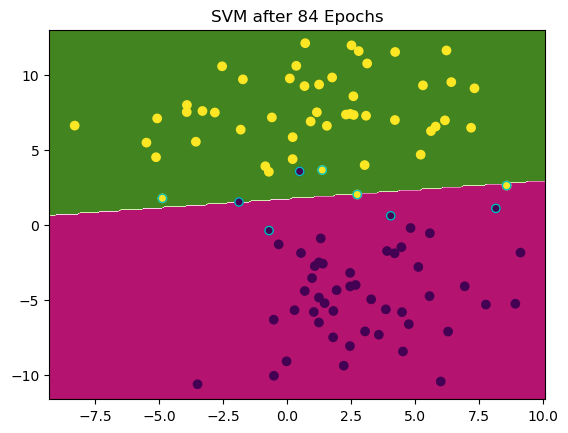

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=85).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 85: 0.96


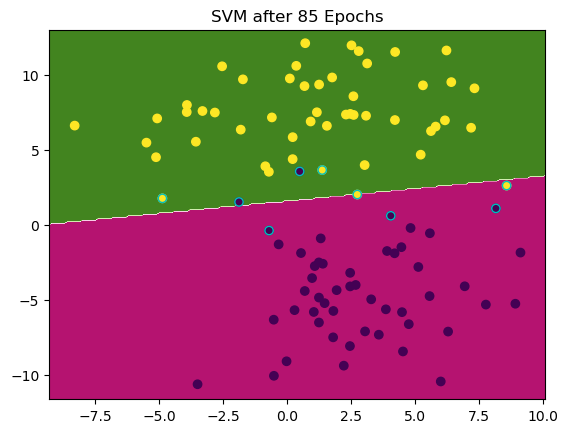

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=86).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 86: 0.97


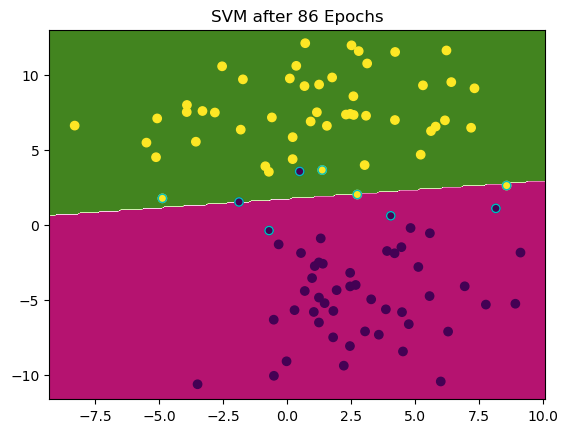

accuracy for i = 87: 0.96


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=87).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


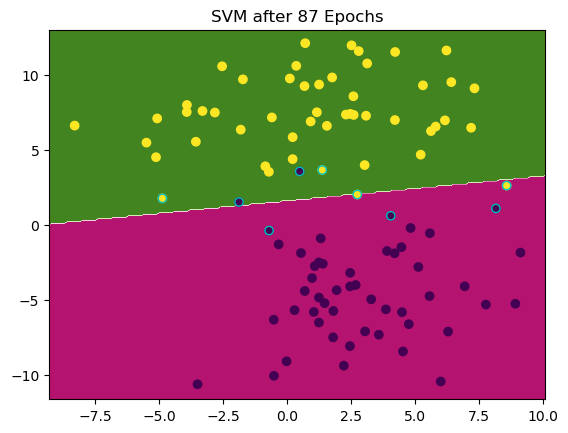

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=88).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 88: 0.96


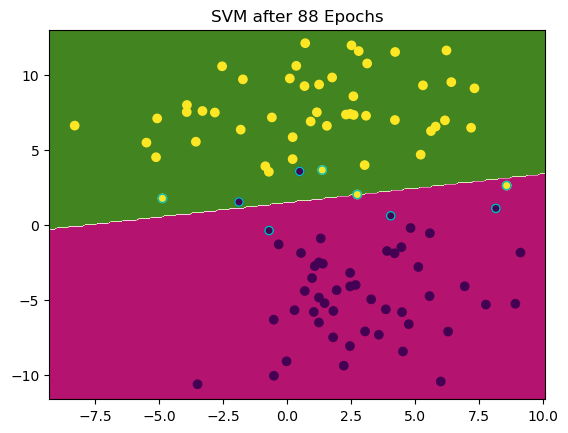

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=89).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 89: 0.96


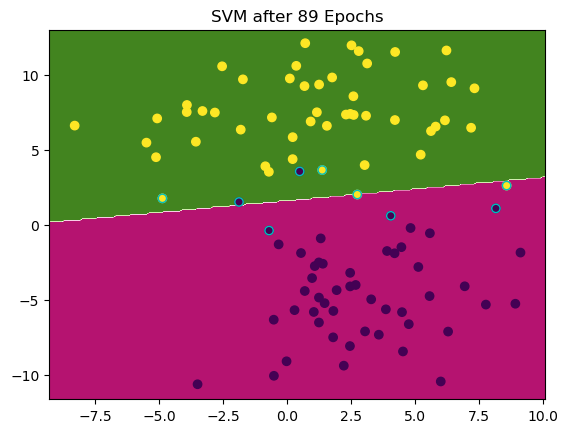

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=90).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 90: 0.96


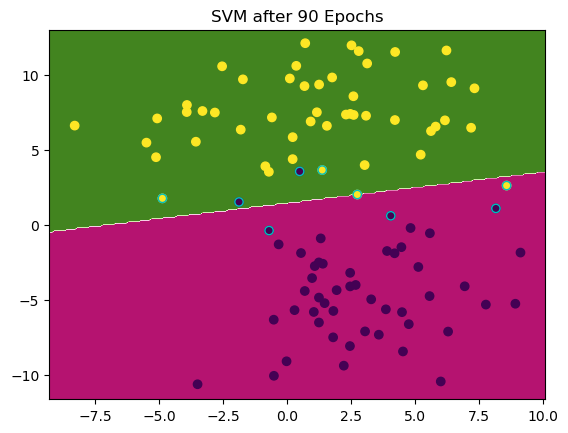

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=91).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 91: 0.96


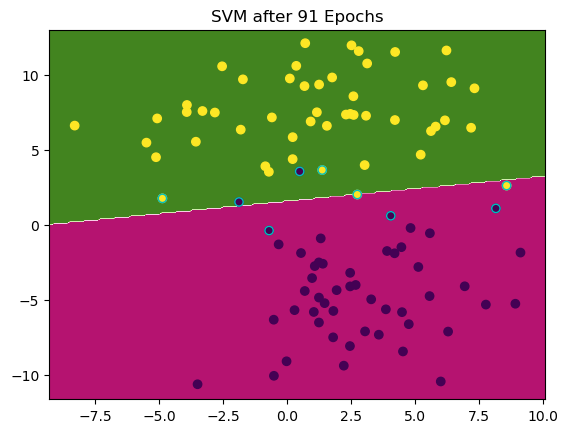

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=92).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 92: 0.97


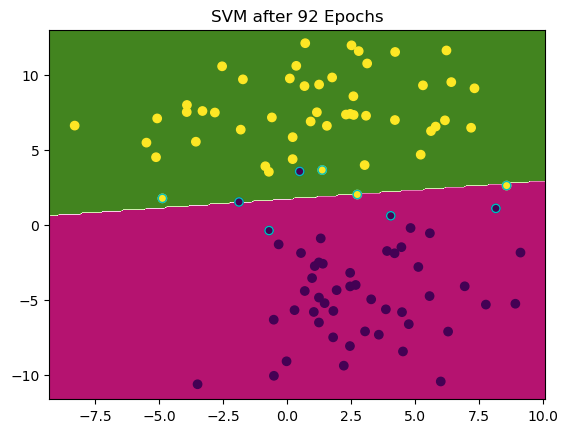

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=93).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 93: 0.96


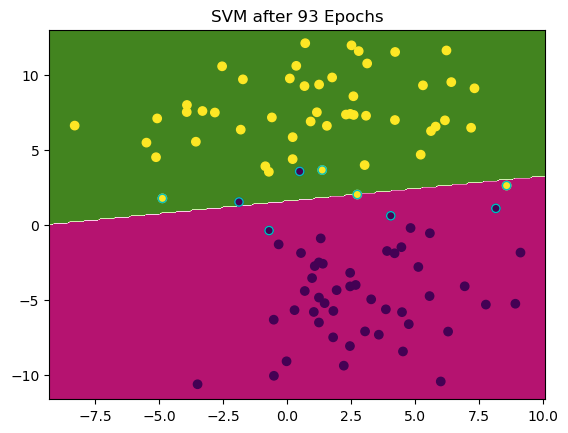

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=94).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 94: 0.97


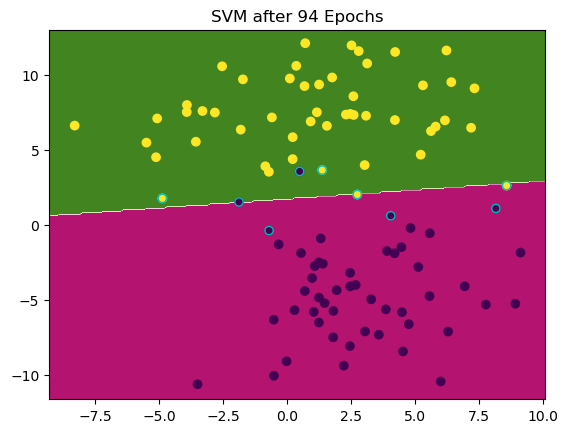

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=95).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 95: 0.96


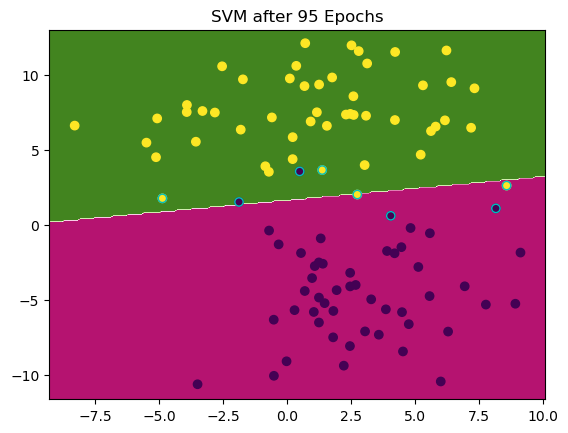

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=96).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 96: 0.96


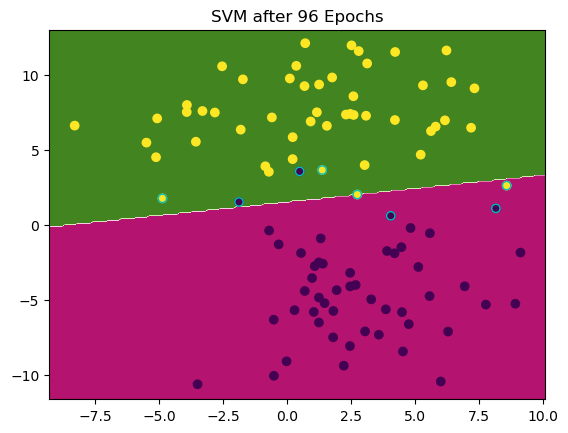

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=97).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 97: 0.96


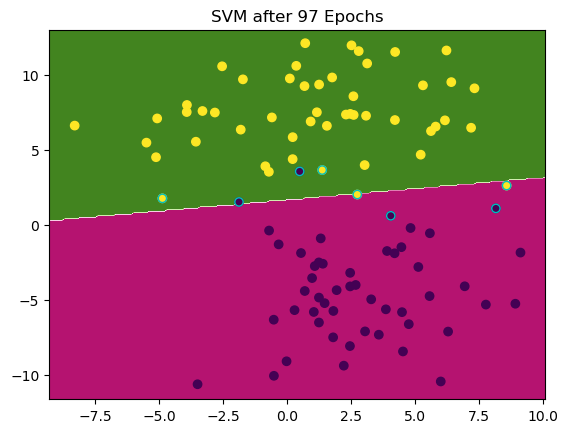

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=98).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 98: 0.96


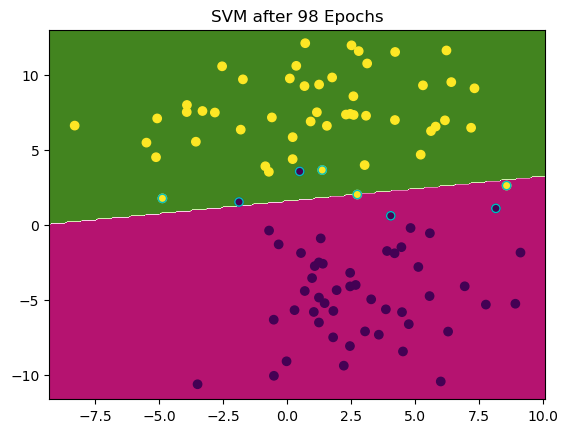

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=99).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 99: 0.96


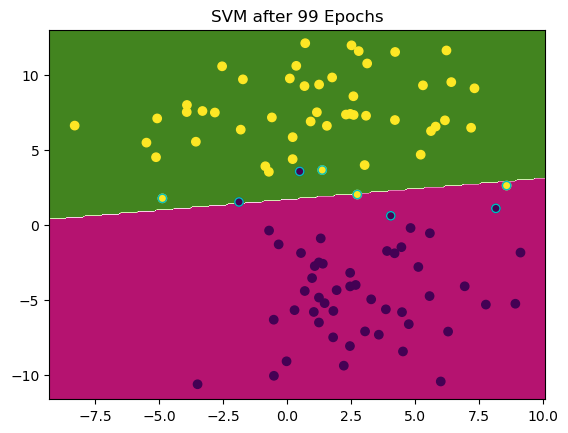

In [10]:
%matplotlib inline
x = confusing_blobs[0] # CONSIDER USING THE CONFUSING_BLOBS and / or CIRCLE_BLOBS
y = confusing_blobs[1] # CONSIDER USING THE CONFUSING_BLOBS and / or CIRCLE_BLOBS

for i in range(100): # CONSIDER CHANGING THE MAX NUMBER OF ITERATIONS
    svm = sklearn.svm.SVC(max_iter=i,kernel='linear') # CONSIDER CHANGING THE KERNEL
    svm.fit(x,y) 
    print("accuracy for i = " + str(i) + ": " + str(svm.score(x,y)))
    show_decision_surface(svm, x, y, svm.support_vectors_, i)